## mRKS method

Please check the original paper:\
\[1\] [Ryabinkin, Kohut and Staroverov, PRL 115, 083001 (2015)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.115.083001) \
\[2\] [Ospadov, Ryabinkin and Staroverov, J. Chem. Phys. 146, 084103 (2017)](https://doi.org/10.1063/1.4975990) \
\[3\] [Staroverov, Ospadov, Advances in Quantum Chemistry, Volume 79 (2019)](https://doi.org/10.1016/bs.aiq.2019.04.002).\
Detailed examples is in Nobel_Gas examples.

First, build the input wavefunction using Psi4. Note that currently only Psi4.CIWavefunction supports two-particle density matrices (tpdm). CISD is used in this example.

In [1]:
import psi4
import matplotlib.pyplot as plt
import numpy as np

psi4.set_options({"save_jk" : True})
psi4.set_memory(int(2.50e10))
psi4.set_num_threads(4)
psi4.core.clean()

import n2v

import matplotlib as mpl
mpl.rcParams["font.size"] = 11
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["axes.edgecolor"] = "#eae8e9"


  Memory set to  23.283 GiB by Python driver.
  Threads set to 4 by Python driver.


In [2]:
FC2Cl = psi4.geometry( 
""" 
0 1
F -4.622780328 0 0
C -2.225662738 0 0
C 0        0 0
Cl 3.130803758 0 0
noreorient
nocom
units bohr
symmetry c1
""" )

psi4.set_options({"reference" : "rhf",
                  "opdm": True,
                  "tpdm": True,
                  'DFT_SPHERICAL_POINTS': 74,  # Usually specify the DFT spherical grid is highly recommended.
                  'DFT_RADIAL_POINTS': 56,  # See [https://psicode.org/psi4manual/master/dft.html] for options.
                 })  # Spin-Restricted

# IMPORTANT NOTE: ONLY psi4.CIWavefunction or RHF is supported.
wfn = psi4.properties("detci/cc-pcvdz", return_wfn=True, molecule=FC2Cl, properties=["dipole"])[1]

inverter = n2v.Inverter.from_wfn(wfn)

RuntimeError: 
Fatal Error: PSIOManager cannot get a mirror file handle

Error occurred in file: /Users/runner/miniforge3/conda-bld/psi4_1709839991841/work/psi4/src/psi4/libpsio/filemanager.cc on line: 175
The most recent 5 function calls were:



In [ ]:
# Define Plotting grid

x = np.linspace(-7,7,1401)
y = [0]
z = [0]
#grid, shape = inverter.generate_grid(x,y,z) -- Broken unsure why the devs did it this way and not the following way (probably different Devs)
grid, shape = inverter.eng.grid.generate_grid(x,y,z)

In [ ]:
# Perform inversion
inverter.invert("mRKS", vxc_grid=grid, opt_max_iter=30, frac_old=0.8, init="scan", sing=(1e-7, 1e-4, 1e-7, 1e-4))

Memory taken by ERI integral matrix and 2pdm is about: 1.033 GB.
vxchole quadrature double integral starts (15594 points): .........

/opt/anaconda3/envs/n2venv/lib/python3.12/site-packages/n2v/inverter.py:297: SyntaxWarning: invalid escape sequence '\s'
  """


KeyboardInterrupt: 

AttributeError: 'Inverter' object has no attribute 'grid'

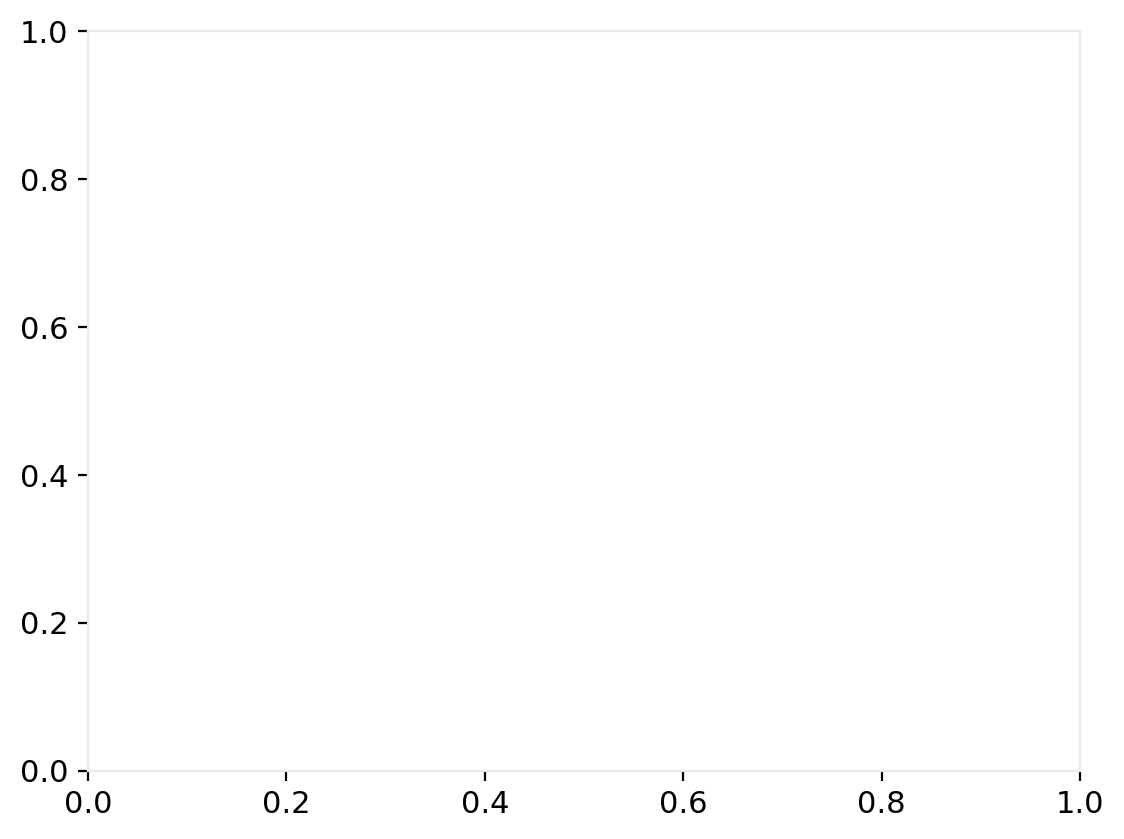

In [ ]:
fig, ax = plt.subplots(dpi=200)
ax.plot(x, inverter.grid.vxc, label="vxc")
ax.legend()
fig.show()